In [1]:
import torch
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../kernel_regression')
from kernel_regressor import KernelRegressionLayer

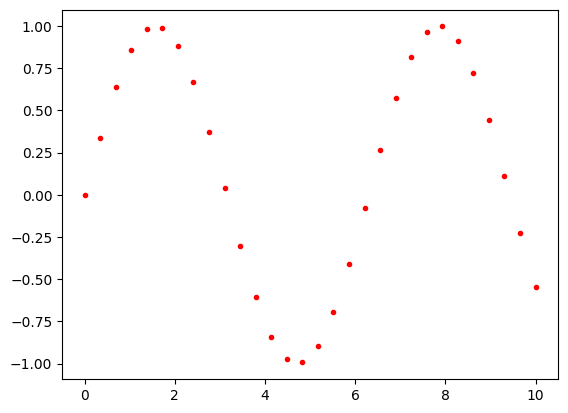

In [2]:
# Plot training data first
X_train = torch.unsqueeze(torch.linspace(0, 10, steps=30), 1)
y_train = torch.sin(X_train)

plt.plot(X_train, y_train, 'r.')

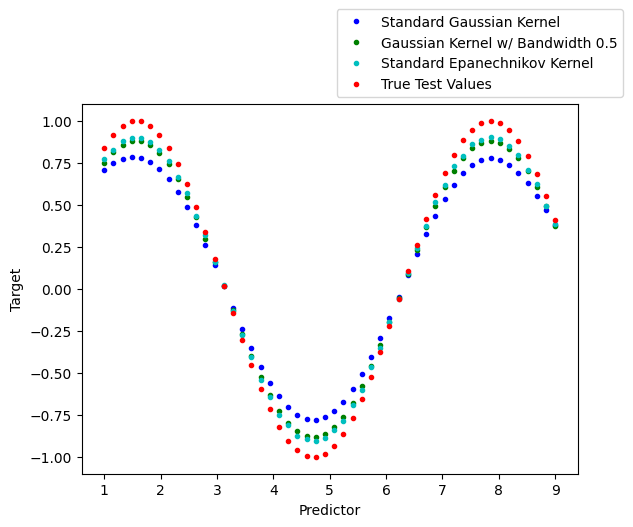

In [3]:
from kernels import epanechnikov_kernel

# Define testing set
X_test = torch.unsqueeze(torch.linspace(1, 9, steps=50), 1)
y_test = torch.sin(X_test)

# Look at predictions from a standard Gaussian kernel
model = KernelRegressionLayer(X_train=X_train,
                              y_train=y_train)
y_test_pred = model(X_test)

# Look at predictions from a Gaussian kernel with a smaller bandwidth
y_test_pred_modified = model(X_test, bandwidth=0.5)

# Look at predictions from Epanechnikov kernel
model_epa = KernelRegressionLayer(X_train=X_train,
                                       y_train=y_train,
                                       kernel=epanechnikov_kernel)
y_test_pred_epa = model_epa(X_test)

# Plot points to see if our kernel regressor works
plt.plot(X_test, y_test_pred, 'b.',
         label='Standard Gaussian Kernel')
plt.plot(X_test, y_test_pred_modified, 'g.',
         label='Gaussian Kernel w/ Bandwidth 0.5')
plt.plot(X_test, y_test_pred_epa, 'c.',
         label='Standard Epanechnikov Kernel')
plt.plot(X_test, y_test, 'r.',
         label='True Test Values')
plt.legend(bbox_to_anchor=(0.5, 1))

plt.xlabel("Predictor")
plt.ylabel("Target")

plt.show()

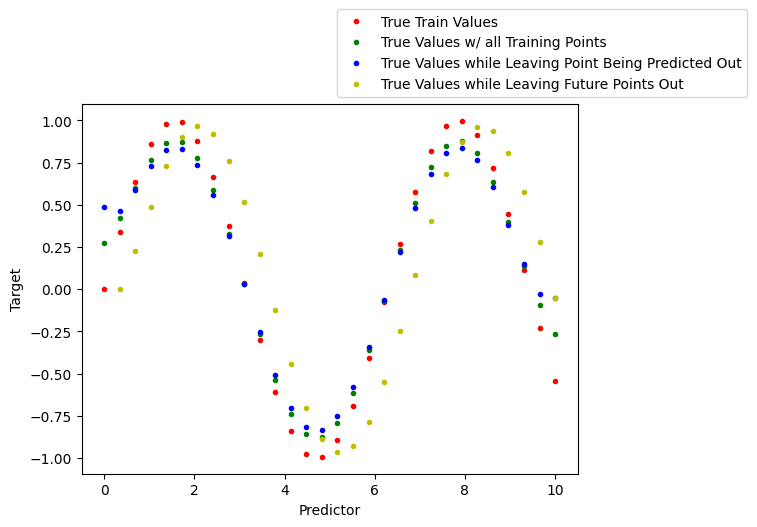

In [4]:
# Test various leave_one_out and hide_future args
y_train_pred_w_pt = model(X_train, bandwidth=0.5)
y_train_pred_wo_pt = model(X_train, leave_one_out=True, bandwidth=0.5)
y_train_pred_wo_future = model(X_train, leave_one_out=True,
                               hide_future=True, bandwidth=0.5)

plt.plot(X_train, y_train, 'r.',
         label="True Train Values")
plt.plot(X_train, y_train_pred_w_pt, 'g.',
         label="True Values w/ all Training Points")
plt.plot(X_train, y_train_pred_wo_pt, 'b.',
         label="True Values while Leaving Point Being Predicted Out")
plt.plot(X_train, y_train_pred_wo_future, 'y.',
         label="True Values while Leaving Future Points Out")
plt.legend(bbox_to_anchor=(0.5, 1))

plt.xlabel("Predictor")
plt.ylabel("Target")

plt.show()


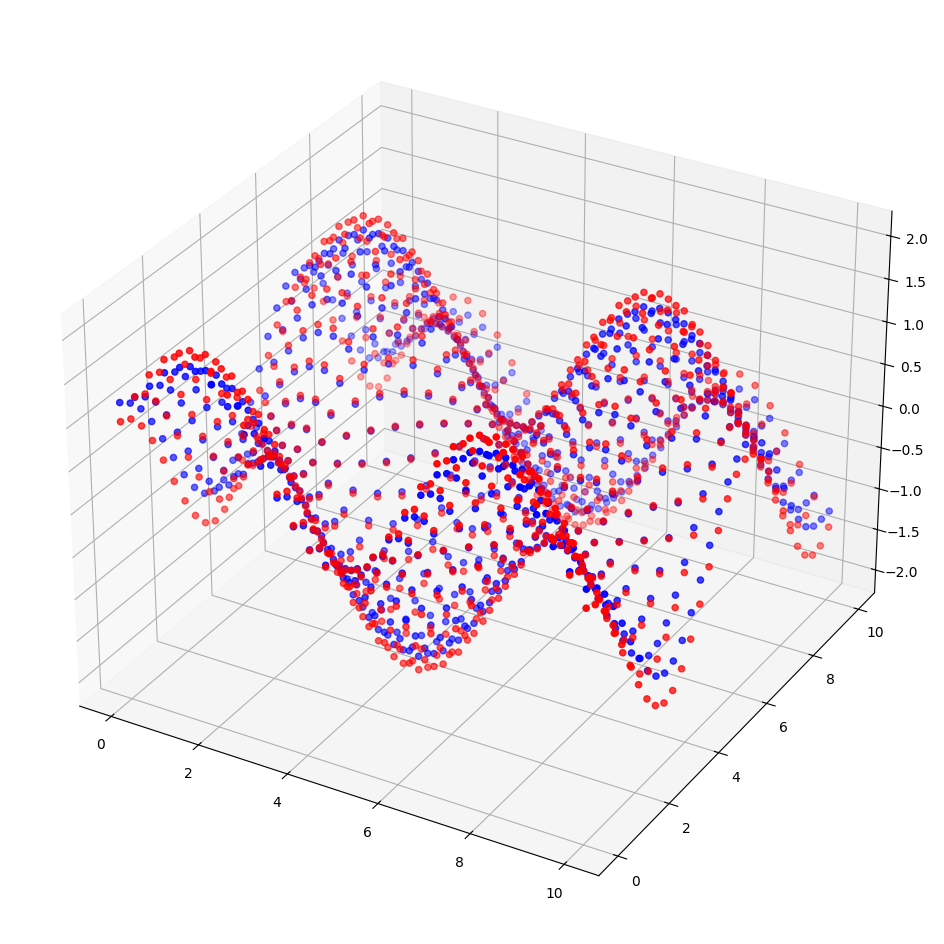

In [5]:
# Testing kernel regression when X has more than 1 feature
grid_coords = torch.linspace(0, 10, steps=30)

X_train = torch.cartesian_prod(grid_coords, grid_coords)
y_train = torch.sin(X_train[:, 0]) + torch.cos(X_train[:, 1])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='red')

# Look at predictions from Epanechnikov kernel
model_epa = KernelRegressionLayer(X_train=X_train,
                                       y_train=y_train,
                                       kernel=epanechnikov_kernel)
y_test_pred_epa = model_epa(X_train, leave_one_out=True)

ax.scatter(X_train[:, 0], X_train[:, 1], y_test_pred_epa, c='blue')
plt.show()